# Alucar - Analisando as vendas

In [6]:
import pandas as pd

In [7]:
alucar = pd.read_csv('data/alucar.csv')

In [8]:
alucar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   mes     24 non-null     object
 1   vendas  24 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 512.0+ bytes


In [9]:
alucar.shape

(24, 2)

In [10]:
alucar.count()

mes       24
vendas    24
dtype: int64

In [11]:
alucar.isna().sum().sum()

0

In [12]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [13]:
alucar['mes'] = pd.to_datetime(alucar.mes)
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [14]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [15]:
import seaborn as sns

In [16]:
%matplotlib inline

In [17]:
from matplotlib import pyplot as plt

In [18]:
sns.__version__

'0.11.0'

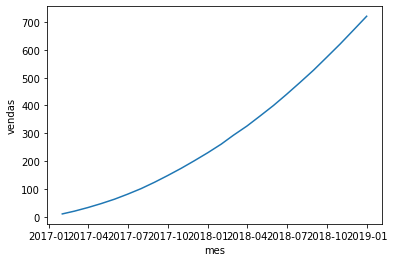

In [19]:
ax = sns.lineplot(x='mes',y='vendas',data=alucar)

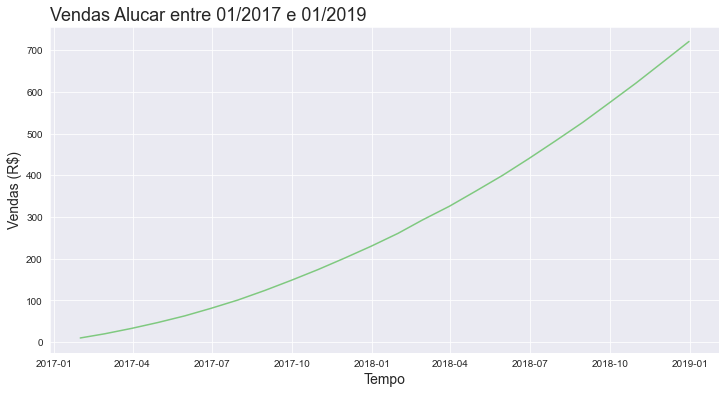

In [20]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes',y='vendas',data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar entre 01/2017 e 01/2019',loc='left',fontsize=18)
ax.set_xlabel('Tempo',fontsize=14)
ax.set_ylabel('Vendas (R$)',fontsize=14)
ax=ax

In [21]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [22]:
alucar['aumento'] = alucar['vendas'].diff()

In [23]:
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


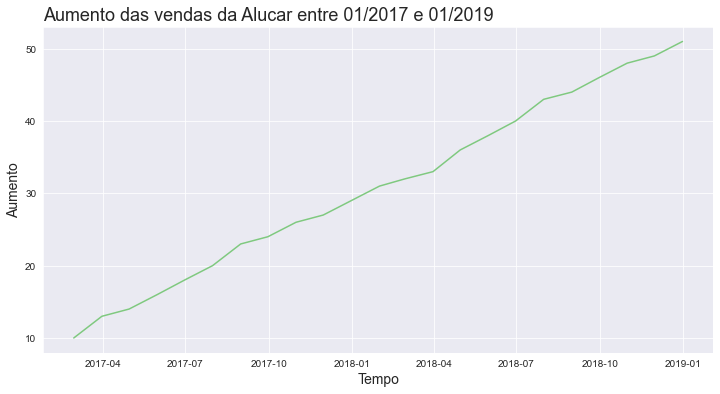

In [24]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes',y='aumento',data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas da Alucar entre 01/2017 e 01/2019',loc='left',fontsize=18)
ax.set_xlabel('Tempo',fontsize=14)
ax.set_ylabel('Aumento',fontsize=14)
ax=ax

In [25]:
def plotar(titulo,labelx,labely,x,y,dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x,y=y,data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo,loc='left',fontsize=18)
    ax.set_xlabel(labelx,fontsize=14)
    ax.set_ylabel(labely,fontsize=14)
    ax=ax

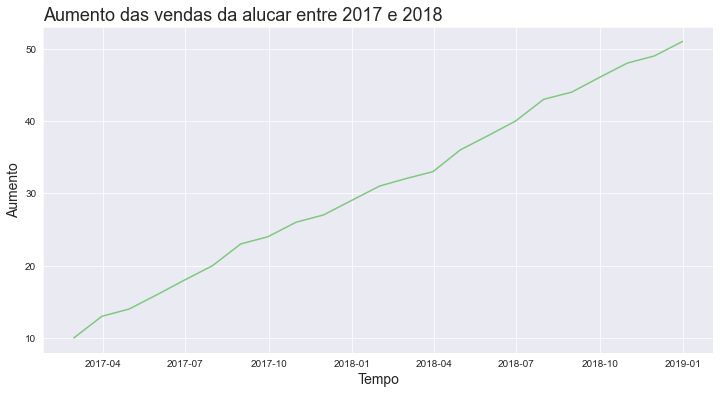

In [26]:
plotar('Aumento das vendas da alucar entre 2017 e 2018','Tempo','Aumento','mes','aumento',alucar)

In [27]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


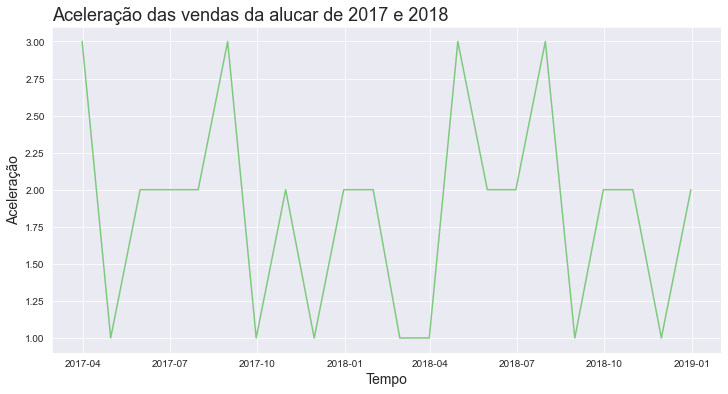

In [28]:
plotar('Aceleração das vendas da alucar de 2017 e 2018','Tempo','Aceleração','mes','aceleracao',alucar)

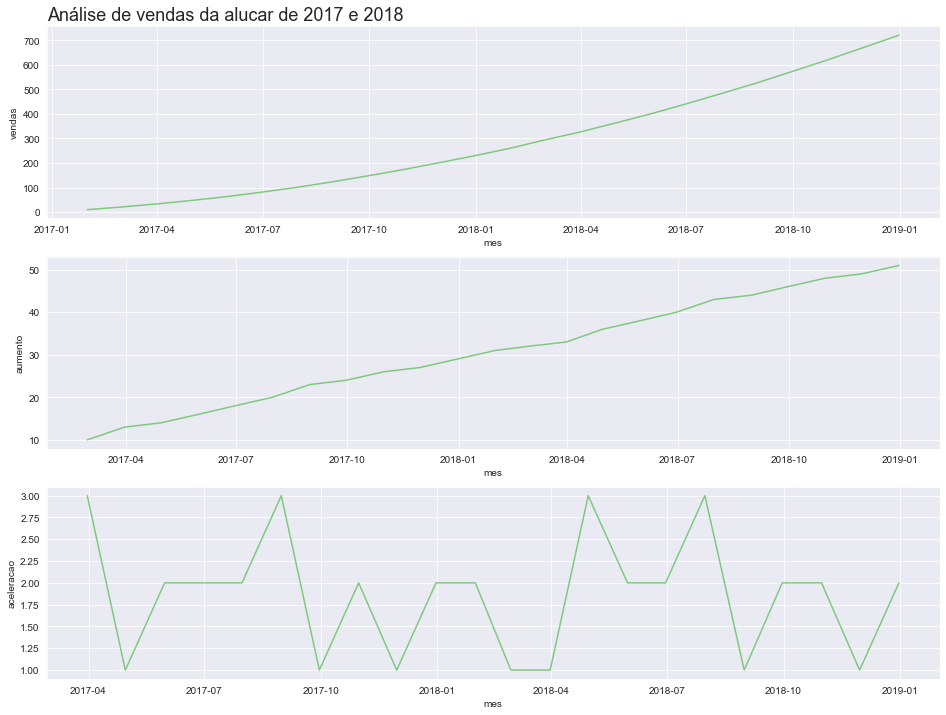

In [29]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise de vendas da alucar de 2017 e 2018',fontsize=18,loc='left')
sns.lineplot(x='mes',y='vendas',data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes',y='aumento',data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes',y='aceleracao',data=alucar)
ax=ax

In [30]:
def plot_comparacao(x,y1,y2,y3,dataset,titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18,loc='left')
    sns.lineplot(x=x,y=y1,data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x,y=y2,data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x,y=y3,data=dataset)
    ax=ax

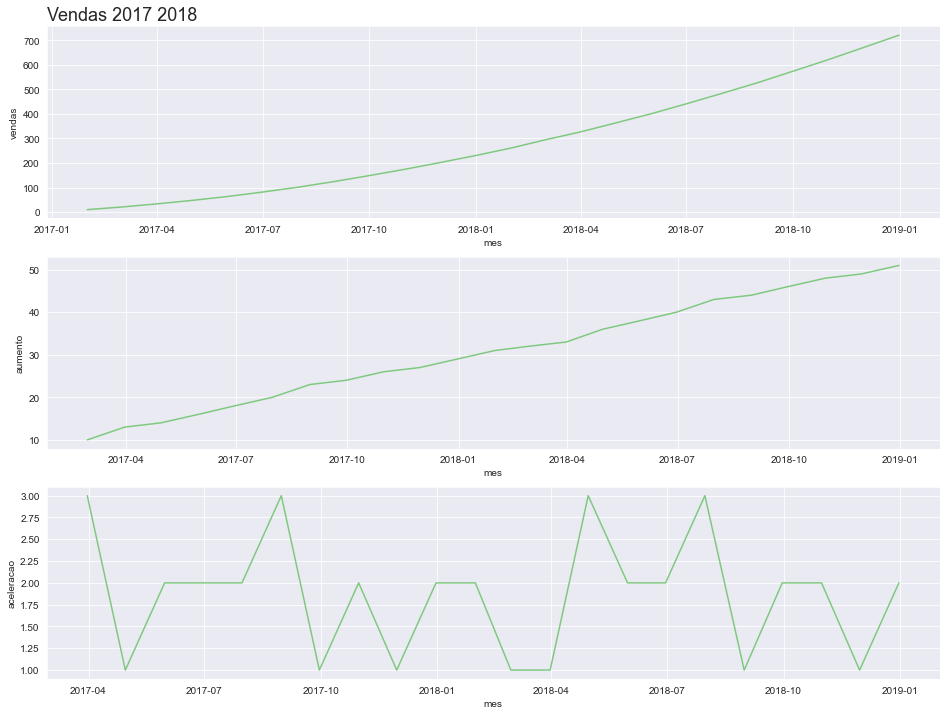

In [31]:
plot_comparacao('mes','vendas','aumento','aceleracao',alucar,'Vendas 2017 2018')

In [32]:
from pandas.plotting import autocorrelation_plot

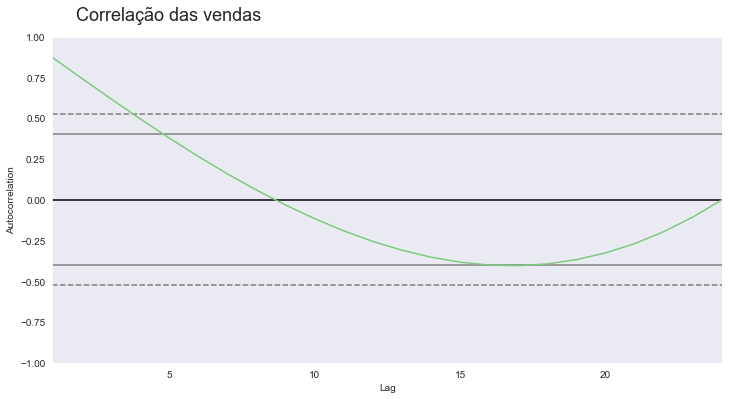

In [33]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize='18',x=0.26,y=0.95)
autocorrelation_plot(alucar['vendas'])
ax=ax

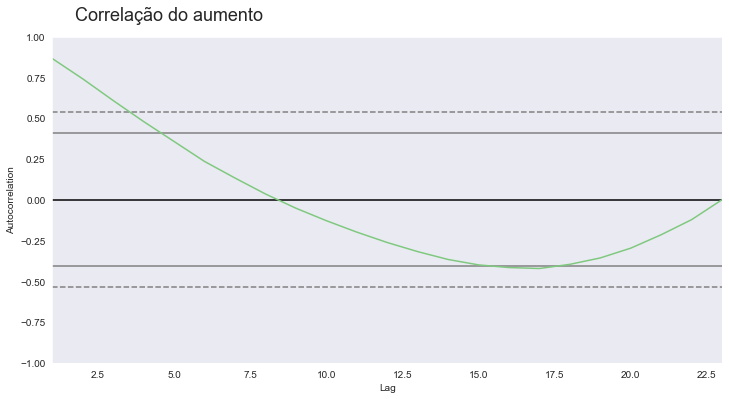

In [34]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize='18',x=0.26,y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax=ax

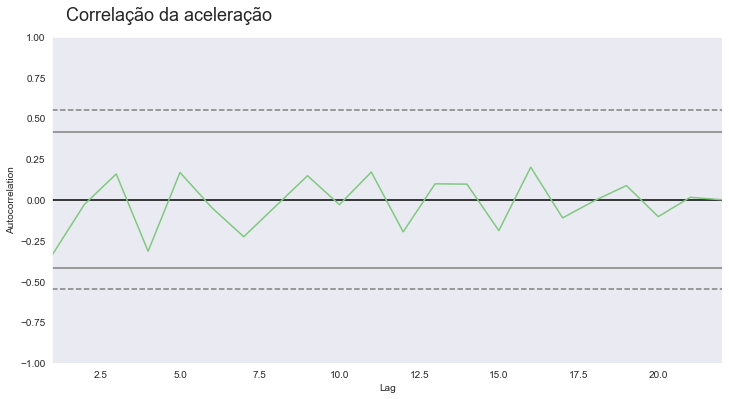

In [35]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize='18',x=0.26,y=0.95)
autocorrelation_plot(alucar['aceleracao'][2::])
ax=ax

In [36]:
assinantes = pd.read_csv('data/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [37]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [38]:
print('Quantidade de linhas e colunas ',assinantes.shape)

Quantidade de linhas e colunas  (24, 2)


In [39]:
print('Quantidade de registros nulo\n ', assinantes.isna().sum())

Quantidade de registros nulo
  mes           0
assinantes    0
dtype: int64


In [40]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [41]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [42]:
assinantes['aumento'] = assinantes.assinantes.diff()
assinantes['aceleracao'] = assinantes.aumento.diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


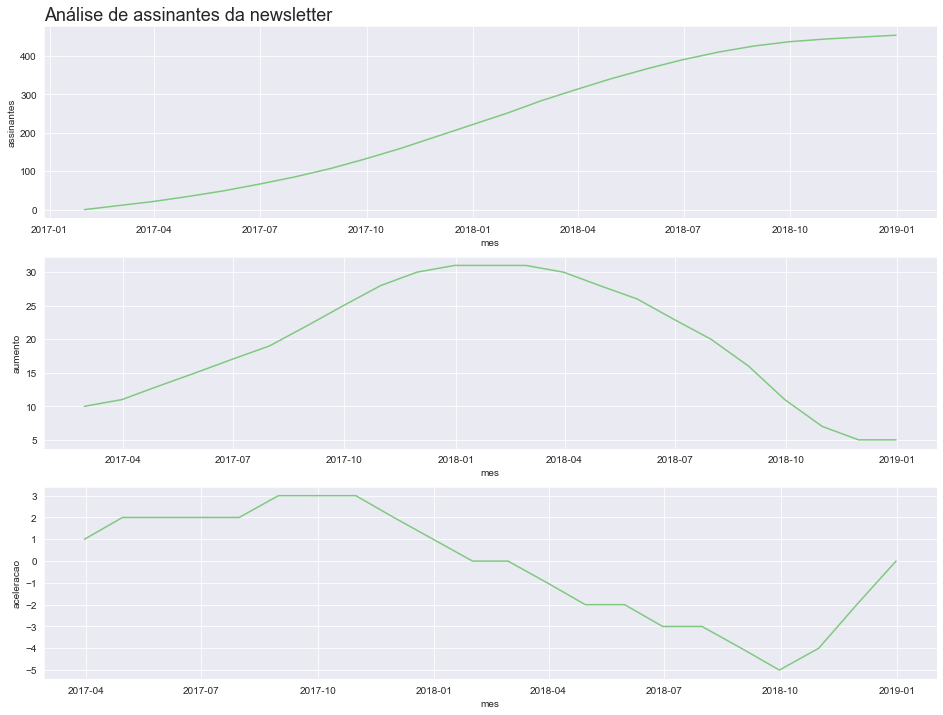

In [43]:
plot_comparacao('mes','assinantes','aumento','aceleracao',assinantes,'Análise de assinantes da newsletter')

# Chocolura

In [44]:
chocolura = pd.read_csv('data/chocolura.csv')
chocolura

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211
5,2017-06,300
6,2017-07,210
7,2017-08,205
8,2017-09,208
9,2017-10,210


In [45]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [46]:
chocolura.mes = pd.to_datetime(chocolura.mes)

In [47]:
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [48]:
chocolura.isna().sum()

mes       0
vendas    0
dtype: int64

In [49]:
chocolura.shape

(24, 2)

In [50]:
chocolura['aumento'] = chocolura.vendas.diff()

In [51]:
chocolura['aceleracao'] = chocolura.aumento.diff()

In [52]:
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


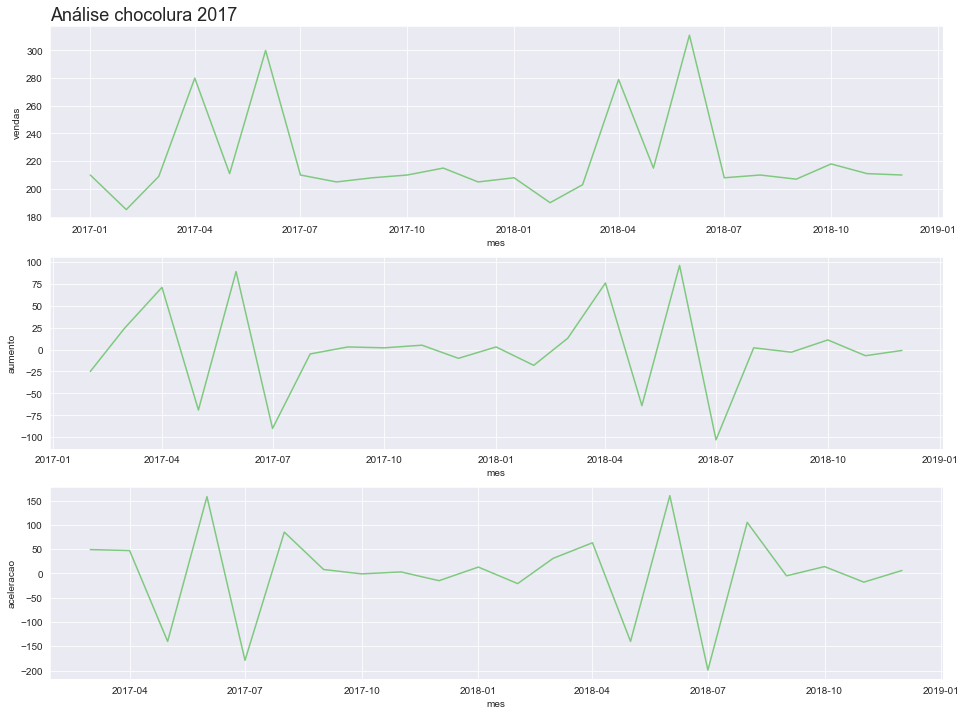

In [53]:
plot_comparacao('mes','vendas','aumento','aceleracao',chocolura,'Análise chocolura 2017')

# chocolura - Vendas diárias (outubro e novembro)

In [54]:
vendas_por_dia = pd.read_csv('data/vendas_por_dia.csv')
vendas_por_dia

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51
...,...,...
56,2018-11-26,54
57,2018-11-27,60
58,2018-11-28,49
59,2018-11-29,50


In [55]:
vendas_por_dia.shape

(61, 2)

In [56]:
vendas_por_dia.isna().sum()

dia       0
vendas    0
dtype: int64

In [57]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [58]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia.dia)

In [59]:
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [60]:
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [61]:
vendas_por_dia['aumento'] = vendas_por_dia.vendas.diff()

In [62]:
vendas_por_dia['aceleracao'] = vendas_por_dia.aumento.diff()

In [63]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


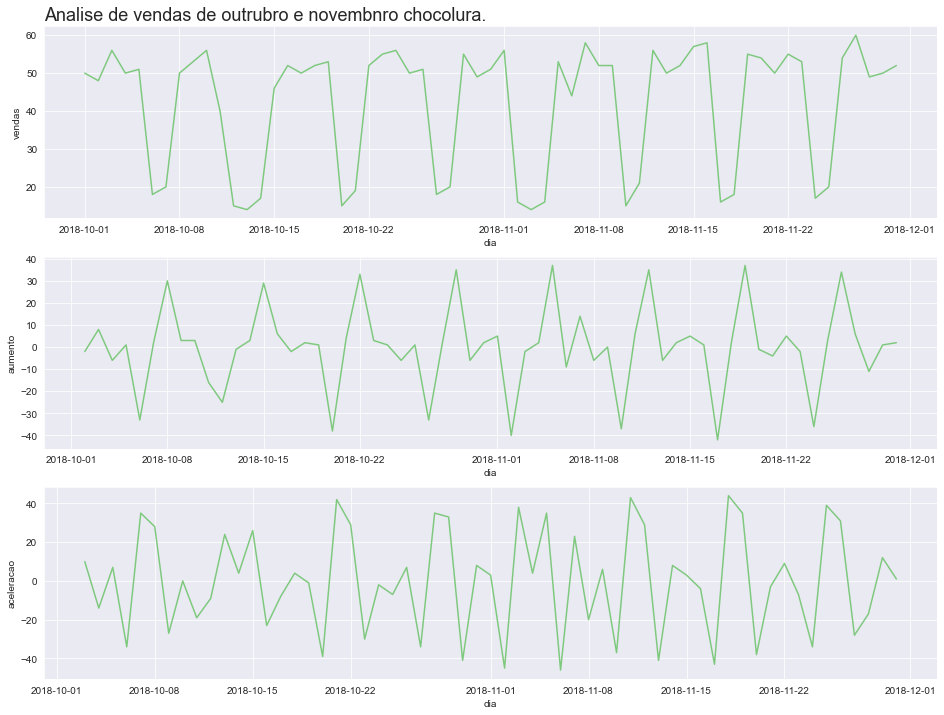

In [64]:
plot_comparacao('dia','vendas','aumento','aceleracao',vendas_por_dia,'Analise de vendas de outrubro e novembnro chocolura.')

# analisando a sazonalidade

In [65]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()

In [66]:
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday
5,2018-10-06,18,-33.0,-34.0,Saturday
6,2018-10-07,20,2.0,35.0,Sunday


In [67]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [68]:
dias_traduzidos = {'Monday':'Segunda', 'Tuesday':'Terca', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sabado',
       'Sunday':'Domingo'}

In [69]:
vendas_por_dia['dia_da_semana']=vendas_por_dia.dia_da_semana.map(dias_traduzidos)
vendas_por_dia.head(7)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo


Agupar vendas por dia

In [70]:
vendas_agrupadas=vendas_por_dia.groupby('dia_da_semana')['vendas','aumento','aceleracao'].mean().round()
vendas_agrupadas

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


Correlação das vendas diárias

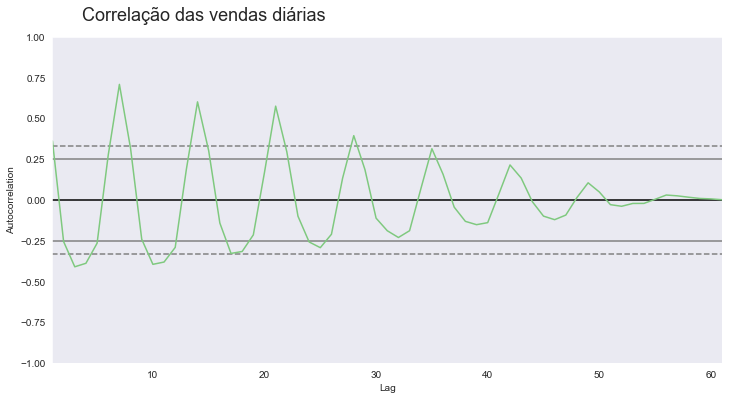

In [71]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias',fontsize=18,x=0.3,y=0.95)
autocorrelation_plot(vendas_por_dia.vendas)
ax=ax

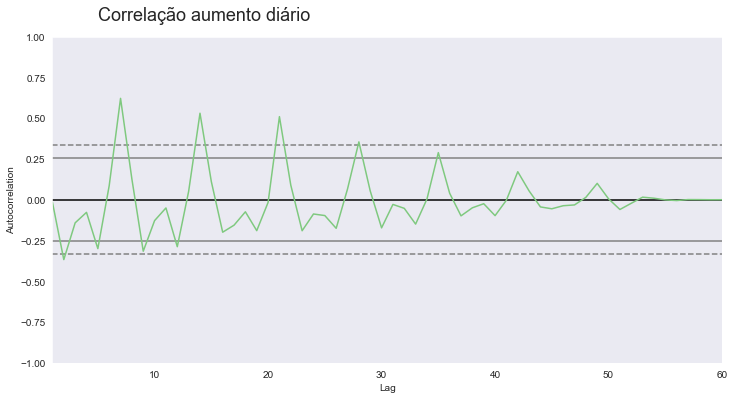

In [72]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlação aumento diário',fontsize=18,x=0.3,y=0.95)
autocorrelation_plot(vendas_por_dia.aumento[1:])
ax=ax

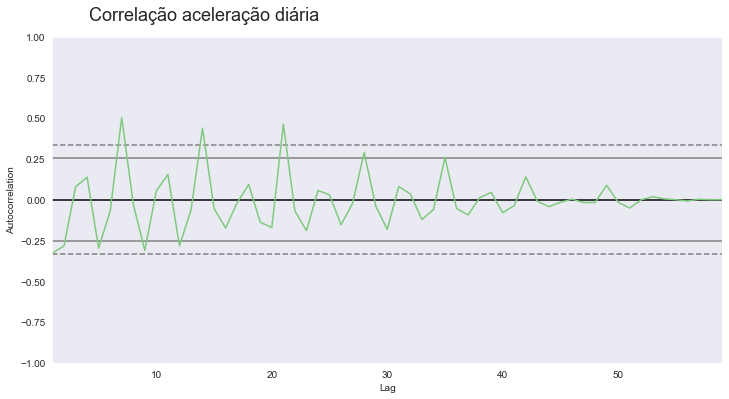

In [73]:
ax=plt.figure(figsize=(12,6))
ax.suptitle('Correlação aceleração diária',fontsize=18,x=0.3,y=0.95)
autocorrelation_plot(vendas_por_dia.aceleracao[2:])
ax=ax

# cafelura análise de vendas

In [74]:
cafelura = pd.read_csv('data/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [75]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [76]:
cafelura['mes']=pd.to_datetime(cafelura.mes)
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [77]:
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [78]:
cafelura['aumento']=cafelura.vendas.diff()

In [79]:
cafelura.head()

,mes,vendas,aumento
0,2017-01-31,880,NaN
1,2017-02-28,1600,720.0
2,2017-03-31,3240,1640.0
3,2017-04-30,3840,600.0
4,2017-05-31,5670,1830.0


In [80]:
cafelura['aceleracao']=cafelura.aumento.diff()

In [81]:
cafelura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,880,NaN,NaN
1,2017-02-28,1600,720.0,NaN
2,2017-03-31,3240,1640.0,920.0
3,2017-04-30,3840,600.0,-1040.0
4,2017-05-31,5670,1830.0,1230.0


In [82]:
cafelura.isna().sum()

mes           0
vendas        0
aumento       1
aceleracao    2
dtype: int64

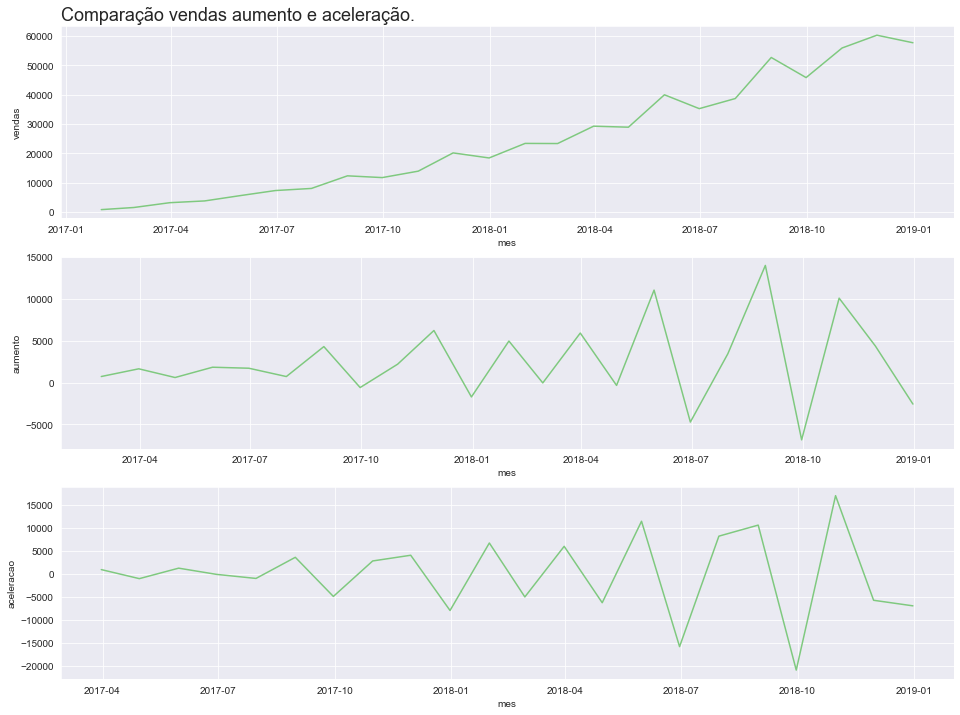

In [83]:
plot_comparacao('mes','vendas','aumento','aceleracao',cafelura,'Comparação vendas aumento e aceleração.')

In [84]:
cafelura.shape

(24, 4)

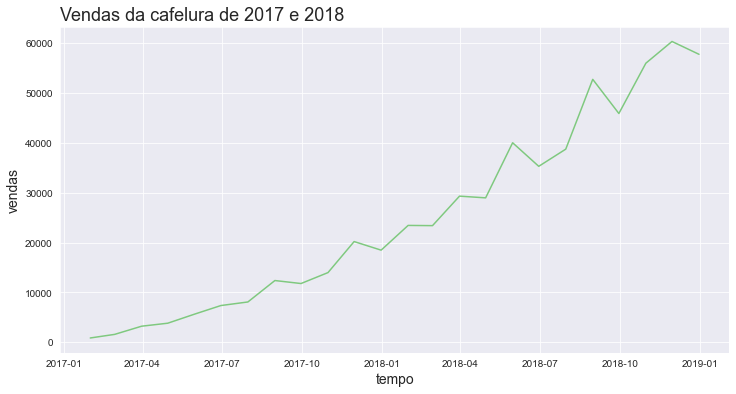

In [85]:
plotar('Vendas da cafelura de 2017 e 2018','tempo','vendas','mes','vendas',cafelura)

In [86]:
quantidades_de_dias_de_fds = pd.read_csv('data/dias_final_de_semana.csv')
quantidades_de_dias_de_fds

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9
5,9
6,8
7,10
8,8
9,8


In [87]:
quantidades_de_dias_de_fds.quantidade_de_dias.values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8], dtype=int64)

In [88]:
cafelura['vendas_normalizadas'] = cafelura.vendas / quantidades_de_dias_de_fds.quantidade_de_dias.values

In [89]:
cafelura.head()

,mes,vendas,aumento,aceleracao,vendas_normalizadas
0,2017-01-31,880,NaN,NaN,110.0
1,2017-02-28,1600,720.0,NaN,200.0
2,2017-03-31,3240,1640.0,920.0,324.0
3,2017-04-30,3840,600.0,-1040.0,480.0
4,2017-05-31,5670,1830.0,1230.0,630.0


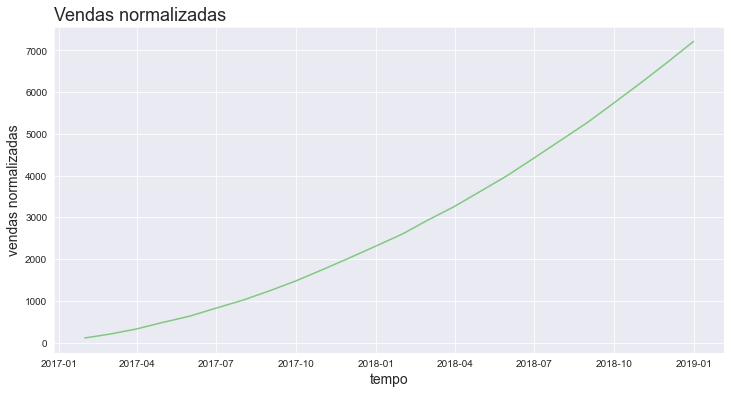

In [90]:
plotar('Vendas normalizadas','tempo','vendas normalizadas','mes','vendas_normalizadas',cafelura)

<AxesSubplot:title={'center':'Vendas normalizadas 2017 e 2018'}, xlabel='mes', ylabel='vendas_normalizadas'>

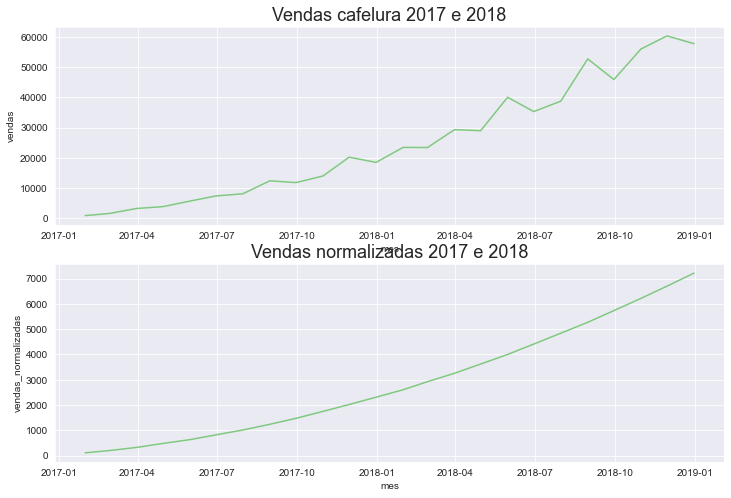

In [91]:
plt.figure(figsize=(12,8))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes',y='vendas',data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas 2017 e 2018', fontsize=18)
sns.lineplot(x='mes',y='vendas_normalizadas',data=cafelura)


# statsmodels

<AxesSubplot:>

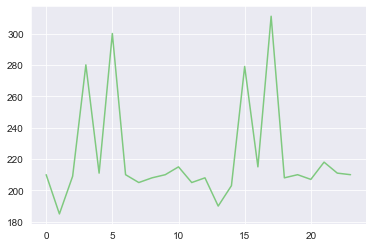

In [115]:
from statsmodels.tsa.seasonal import seasonal_decompose
chocolura.head()
chocolura.dtypes
chocolura.vendas.plot()

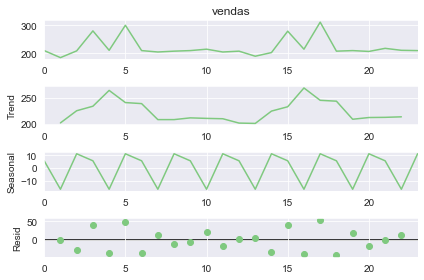

In [128]:
resultados = seasonal_decompose(chocolura.vendas,period=3)
ax = resultados.plot()

In [129]:
observacao = resultados.observed
tendencia = resultados.trend
sazonalidade = resultados.seasonal
ruido = resultados.resid

data = ({
    'observacao':observacao,
    'tendencia':tendencia,
    'sazonalidade':sazonalidade,
    'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210.0,NaN,5.603175,NaN
1,185.0,201.333333,-16.730159,0.396825
2,209.0,224.666667,11.126984,-26.793651
3,280.0,233.333333,5.603175,41.063492
4,211.0,263.666667,-16.730159,-35.936508


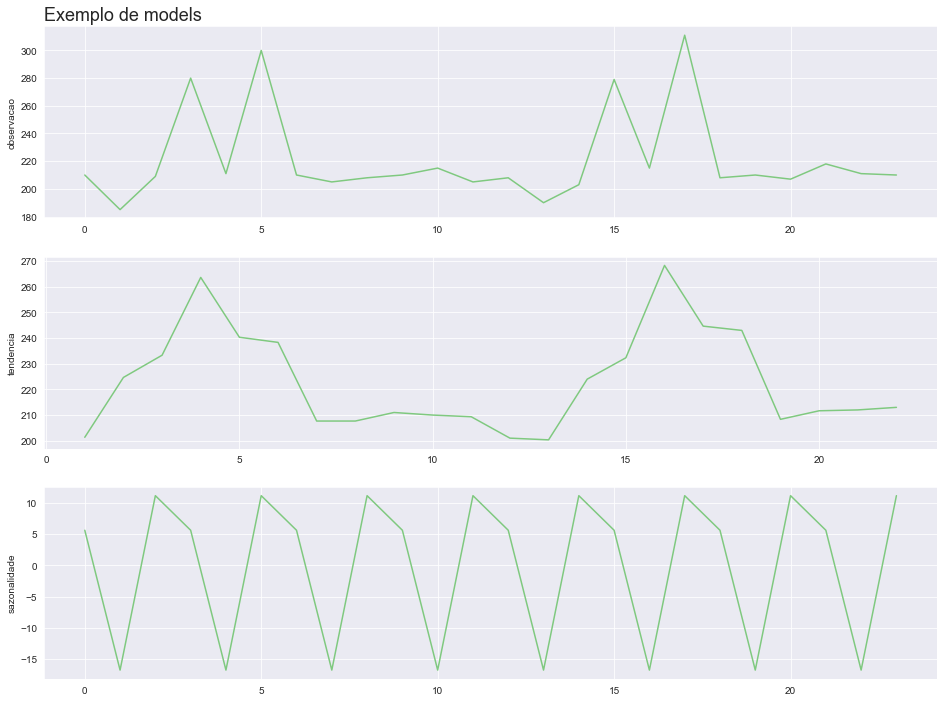

In [132]:
plot_comparacao(resultado.index,'observacao','tendencia','sazonalidade',resultado,'Exemplo de models')

# Alucel

In [133]:
alucel = pd.read_csv('data/alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [134]:
alucel.shape

(61, 2)

In [135]:
alucel.dtypes

dia        object
vendas    float64
dtype: object

In [137]:
alucel['dia'] = pd.to_datetime(alucel.dia)
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [138]:
alucel.isna().sum()

dia       0
vendas    0
dtype: int64

<AxesSubplot:>

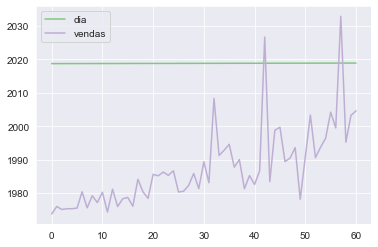

In [139]:
alucel.plot()

In [140]:
alucel['aumento'] = alucel.vendas.diff()

In [141]:
alucel['aceleracao'] = alucel.aumento.diff()

In [142]:
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


<AxesSubplot:>

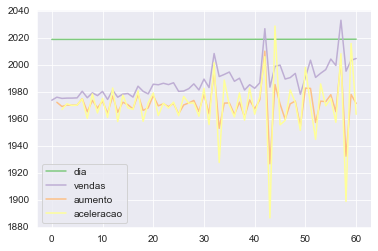

In [143]:
alucel.plot()

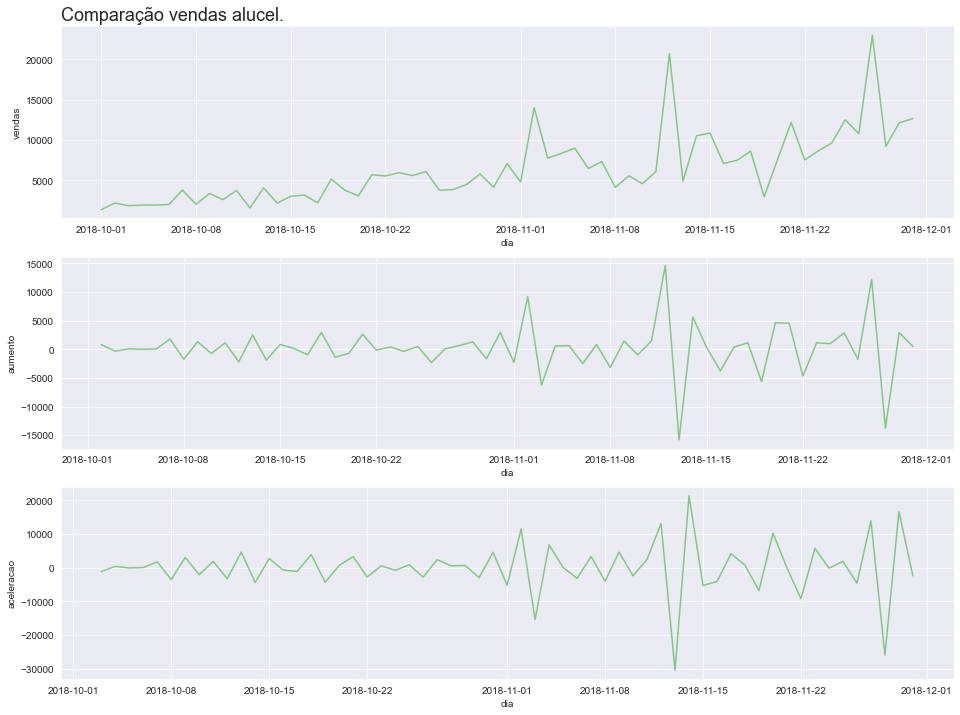

In [144]:
plot_comparacao('dia','vendas','aumento','aceleracao',alucel,'Comparação vendas alucel.')

# media movel

In [145]:
alucel['media_movel'] = alucel.vendas.rolling(7).mean()

In [146]:
alucel.head()

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN


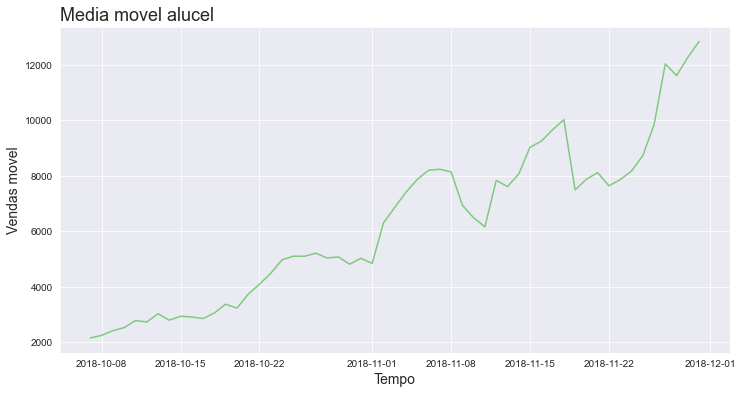

In [147]:
plotar('Media movel alucel','Tempo','Vendas movel','dia','media_movel',alucel)

In [150]:
alucel['media_movel_21'] = alucel.vendas.rolling(21).mean()

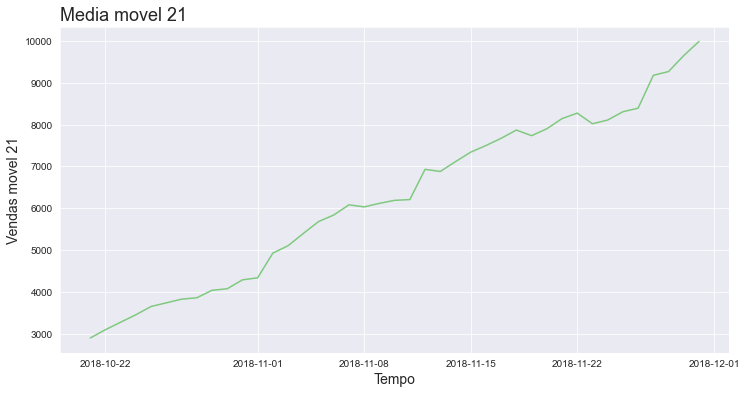

In [151]:
plotar('Media movel 21','Tempo','Vendas movel 21','dia','media_movel_21',alucel)

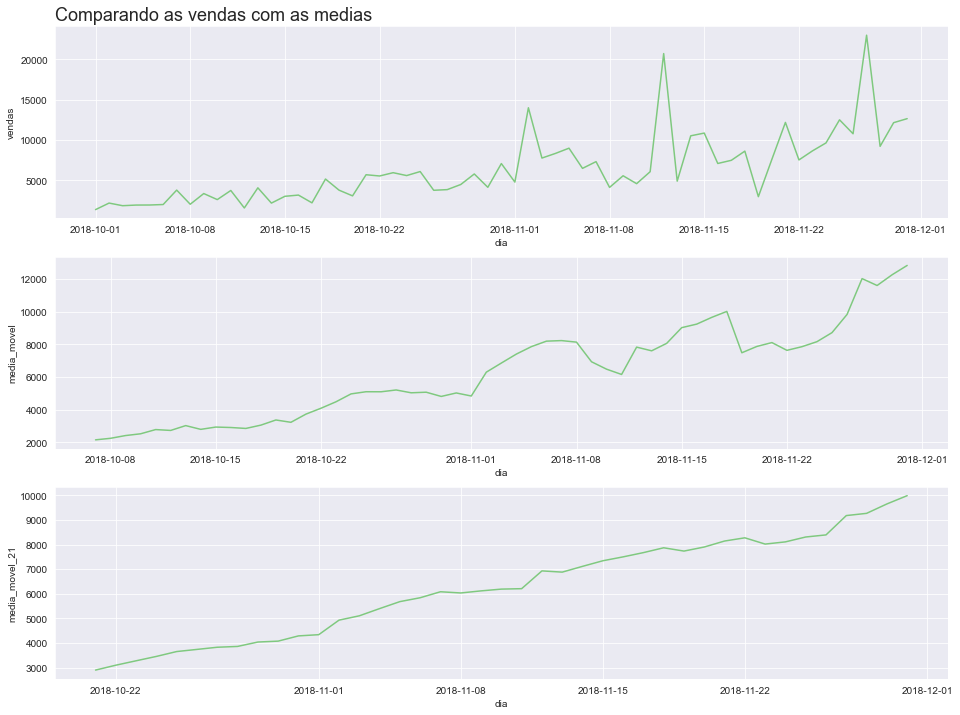

In [152]:
plot_comparacao('dia','vendas','media_movel','media_movel_21',alucel,'Comparando as vendas com as medias')

<AxesSubplot:>

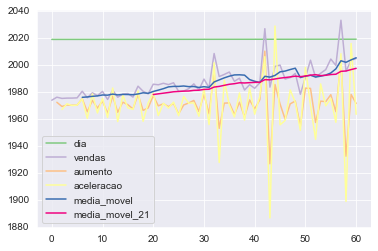

In [153]:
alucel.plot()